In [6]:
import numpy as np
import pandas as pd
import requests

In [7]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5098,spam,TheMob>Hit the link to get a premium Pink Pant...,NaN,NaN,NaN
2644,ham,My friends use to call the same.,NaN,NaN,NaN
482,ham,Watching tv lor...,NaN,NaN,NaN
2893,ham,K...k...yesterday i was in cbe .,NaN,NaN,NaN
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
#droping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [19]:
df.sample(5)

,v1,v2
1104,spam,Message Important information for O2 user. Tod...
603,ham,Be happy there. I will come after noon
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
3981,ham,His frens go then he in lor. Not alone wif my ...
2479,spam,Sppok up ur mob with a Halloween collection of...


In [21]:
# renaming columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2729,spam,Urgent! Please call 09066612661 from your land...
1002,ham,Yes..he is really great..bhaji told kallis bes...
3743,ham,Nobody names their penis a girls name this sto...
4253,ham,"How about clothes, jewelry, and trips?"
477,ham,Tension ah?what machi?any problem?


In [23]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
#checking duplicating
df.duplicated().sum()

403

In [33]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

# 2. EDA

In [40]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [44]:
import matplotlib.pyplot as plt

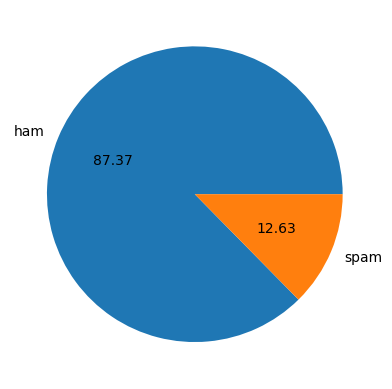

In [45]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [46]:
# Data is imbalanced :(


In [47]:
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [52]:
df['num_characters'] = df['text'].apply(len)

In [56]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
# Fetching number of words

In [60]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [61]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [68]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:

#ham
df[df['target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
#Spam
df[df['target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [74]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

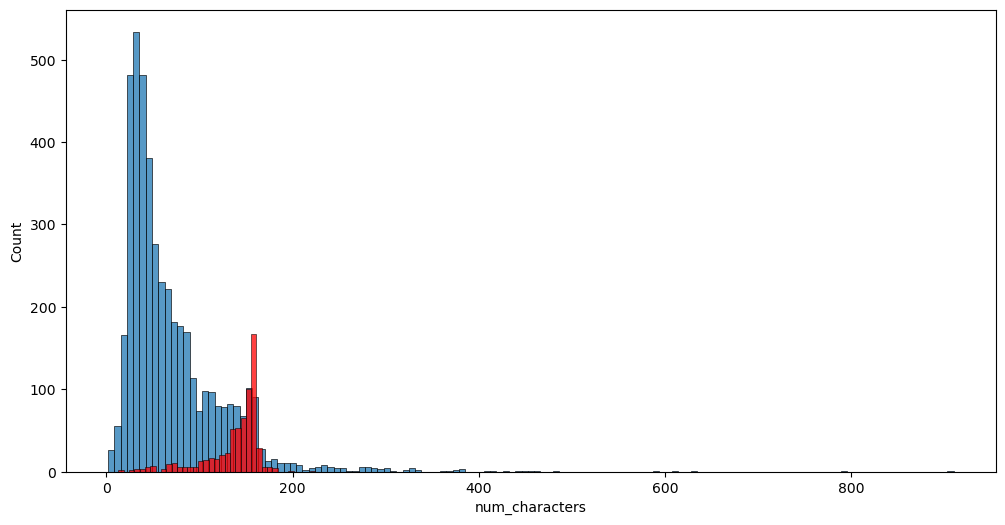

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

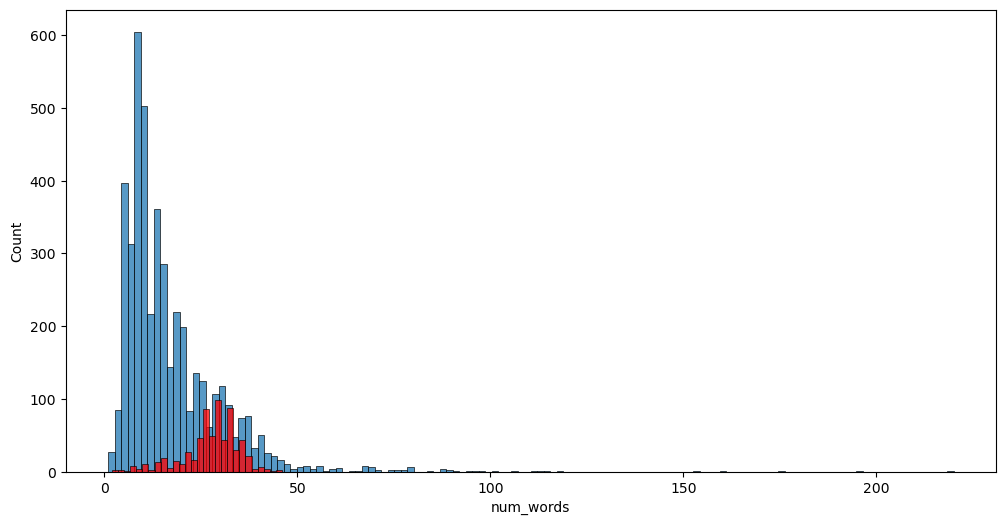

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

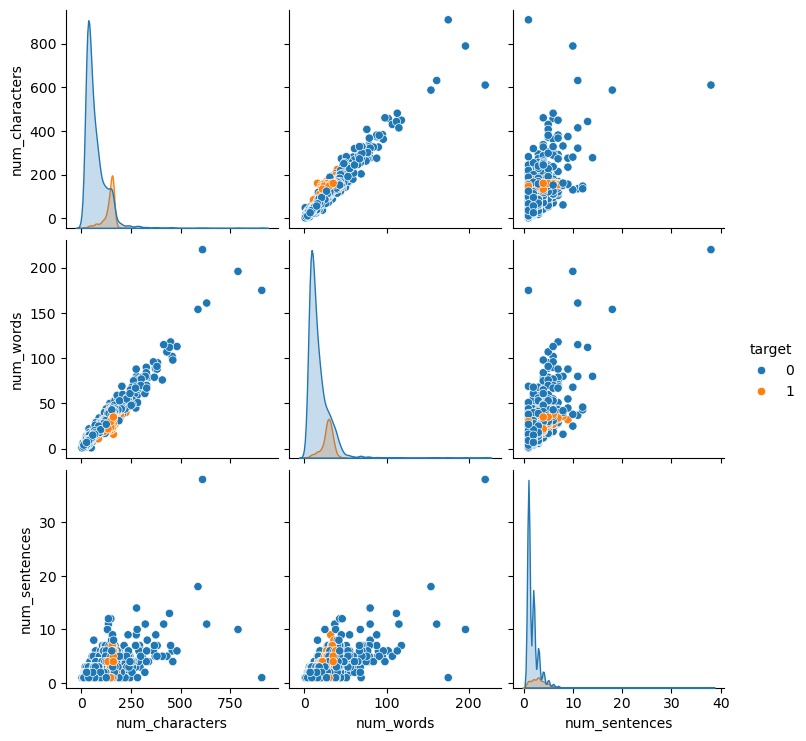

In [79]:
sns.pairplot(df, hue='target')

In [81]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# 3. Data Preprocessing

* Lower case
* Tokenization
* Remove Special Character
* Remove stop words and punctuaion
* Stemming

In [84]:
import nltk
import string
from nltk.corpus import stopwords


In [86]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [88]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
  
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [92]:
transform_text('Hi Shantanu, Did you like my presentation?')

'hi shantanu like present'

In [94]:
transform_text('Hi How Are You %% eg')

'hi eg'

In [96]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [98]:
df['transformed_text'] = df['text'].apply(transform_text)

In [100]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [102]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [104]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

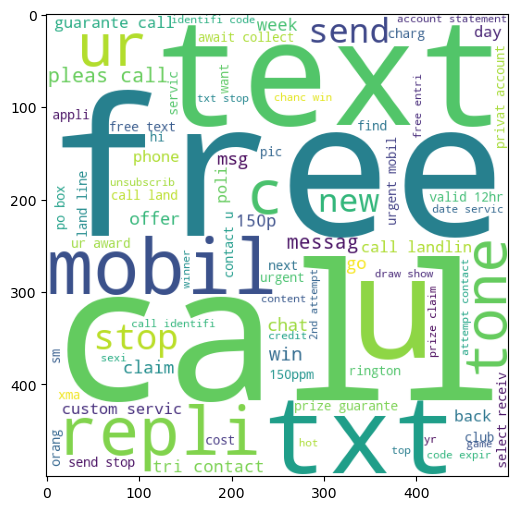

In [106]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [108]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

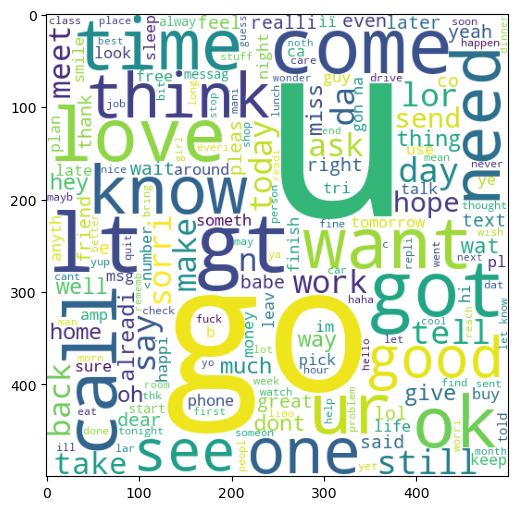

In [110]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [112]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [116]:
len(spam_corpus)

9939

In [126]:
word = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

In [128]:
count = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

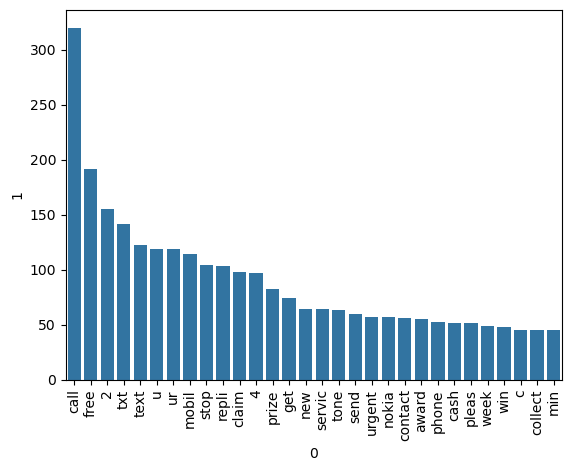

In [130]:
from collections import Counter
sns.barplot(x=word ,y=count, data=df)
plt.xticks(rotation='vertical')
plt.show()


In [132]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [134]:
len(ham_corpus)

35404

In [136]:
word1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

In [138]:
count1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

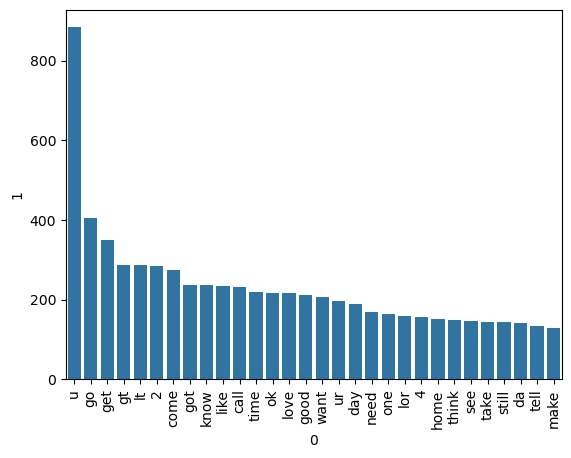

In [140]:
from collections import Counter
sns.barplot(x=word1 ,y=count1, data=df)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [143]:
# vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [147]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [149]:
X.shape

(5169, 3000)

In [151]:
y = df['target'].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [159]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [161]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [163]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [165]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [167]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [169]:
#tfidf --> MNB

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [173]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = xgb.XGBClassifier(n_estimators=50, random_state=2)



In [175]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [177]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [179]:
train_classifier(svc, X_train,y_train, X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [181]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For Adaboost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [182]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [185]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,Adaboost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [187]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [189]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,Adaboost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


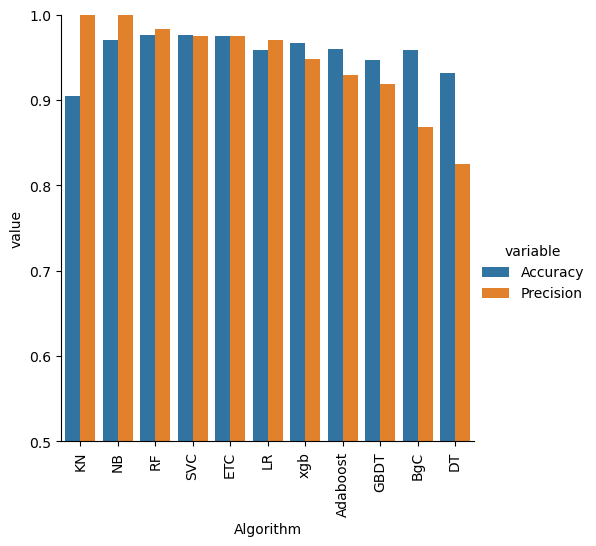

In [191]:
sns.catplot(x = 'Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improve
* 1. change the max_features parameter of Tfidf

In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [196]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores, 'Precsion_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

KeyError: 'Precision_scaling'

In [198]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [200]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [202]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars': accuracy_scores, "Precision_num_chars":precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [204]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,Adaboost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [206]:
#Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [208]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb',mnb), ('et', etc)], voting='soft')

In [210]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [212]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [214]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [216]:
#Applying Stacking 
estimators =[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [218]:
from sklearn.ensemble import StackingClassifier

In [220]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [222]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [224]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))